In [1]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
import matplotlib as mpl

import vector
vector.register_awkward

<function vector.register_awkward() -> 'None'>

In [4]:
# input = "/work/tharte/datasets/data_samples/bg_morph_2022_SPANET_baseline/output_DATA_JetMET_JMENano_E_2022_postEE_EraE.coffea"
input = "/work/tharte/datasets/testing/new_structure_HH4b_coffea/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

o = load(f"{input}")

print(o.keys())
print(o["variables"])
# print(o)
# print(o["columns"])
samples=list(o["columns"].keys())
print(f"Samples {samples}")
for sample in samples:
    datasets=list(o["columns"][sample].keys())
    print(f"Datasets {datasets}")
    for dataset in datasets:
        categories=list(o["columns"][sample][dataset].keys())
        print(f"Categories {categories}")
        for category in categories:
            variations=o["columns"][sample][dataset][category].keys()
            for var in variations:
                print(f"Category: {category}")
                print(f"Variation: {var}")
                col=o["columns"][sample][dataset][category][var]
                print(f"Columns {col.keys()}")
                print(col["weight"])

# Fix the columns I want:
sample = samples[0]
dataset = datasets=list(o["columns"][sample].keys())[0]
categories=list(o["columns"][sample][dataset].keys())

print(sample)
print(dataset)
print(categories)

col_4b = o["columns"][sample][dataset][categories[0]]


dict_keys(['sum_genweights', 'sum_signOf_genweights', 'sumw', 'sumw2', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
{'ElectronGood_eta': defaultdict(<class 'dict'>, {'GluGlutoHHto4B_spanet': {'GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE': Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['AK4PFPuppi_JERDown', 'AK4PFPuppi_JERUp', 'AK4PFPuppi_JES_AbsoluteFlavMapDown', 'AK4PFPuppi_JES_AbsoluteFlavMapUp', 'AK4PFPuppi_JES_AbsoluteScaleDown', 'AK4PFPuppi_JES_AbsoluteScaleUp', 'AK4PFPuppi_JES_FlavorQCDDown', 'AK4PFPuppi_JES_FlavorQCDUp', 'AK4PFPuppi_JES_RelativeJEREC1Down', 'AK4PFPuppi_JES_RelativeJEREC1Up', 'AK4PFPuppi_JES_RelativeJEREC2Down', 'AK4PFPuppi_JES_RelativeJEREC2Up', 'AK4PFPuppi_JES_jesDown', 'AK4PFPuppi_JES_jesUp', 'nominal', 'pileupDown', 'pileupUp', 'sf_ele_idDown', 'sf_ele_idUp', 'sf_ele_recoDown', 'sf_ele_recoUp', 'sf_mu_idDown', 'sf_mu_idUp', 'sf_mu_isoDown', 'sf_mu_isoUp'], name='variation', labe

In [ ]:
input = "/work/tharte/datasets/sample_spanet/loose_selection/output_all.coffea"
input_01_10 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass_01_10/output_all.coffea"
input_05_15 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass/output_all.coffea"
input_03_17 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass_wide/output_all.coffea"
input = "/work/tharte/datasets/data_samples/bg_morph_2022_SPANET_baseline/output_DATA_JetMET_JMENano_C_2022_preEE_EraC.coffea"


o_01_10 = load(f"{input_01_10}")
o_03_17 = load(f"{input_03_17}")
o_05_15 = load(f"{input_05_15}")
o = load(f"{input}")
# print(o)
# print(o["columns"])
samples=list(o["columns"].keys())
print(f"Samples {samples}")
for sample in samples:
    datasets=list(o["columns"][sample].keys())
    print(f"Datasets {datasets}")
    for dataset in datasets:
        categories=list(o["columns"][sample][dataset].keys())
        print(f"Categories {categories}")
        for category in categories:
            col=o["columns"][sample][dataset][category]
            print(f"Columns {col.keys()}")

# Fix the columns I want:
sample = samples[0]
dataset = datasets=list(o["columns"][sample].keys())[0]
categories=list(o["columns"][sample][dataset].keys())

print(sample)
print(dataset)
print(categories)

col_4b = o["columns"][sample][dataset][categories[0]]
col_4b_01_10 = o_01_10["columns"][sample][dataset][categories[0]]
col_4b_03_17 = o_03_17["columns"][sample][dataset][categories[0]]
col_4b_05_15 = o_05_15["columns"][sample][dataset][categories[0]]

In [3]:
### PT ###
print(col_4b.keys())

jets_pt = col_4b["JetGood_pt"].value
jets_n = col_4b["JetGood_N"].value
print(jets_pt)
print(jets_n)
print(jets_pt.shape)

## Unflatten array
jets_by_event = ak.unflatten(jets_pt, jets_n)
print(jets_by_event)
jets_5 = ak.pad_none(jets_by_event, 5, clip=True)
jets_5 = ak.fill_none(jets_5, -999)

jets_5 = ak.to_numpy(jets_5).T
print(jets_5)

# 01_10
jets_pt = col_4b_01_10["JetGood_pt"].value
jets_n = col_4b_01_10["JetGood_N"].value
jets_by_event_01_10 = ak.unflatten(jets_pt, jets_n)
jets_5_01_10 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_01_10,5,clip=True),-999)).T
# 03_17
jets_pt = col_4b_03_17["JetGood_pt"].value
jets_n = col_4b_03_17["JetGood_N"].value
jets_by_event_03_17 = ak.unflatten(jets_pt, jets_n)
jets_5_03_17 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_03_17,5,clip=True),-999)).T
# 05_15
jets_pt = col_4b_05_15["JetGood_pt"].value
jets_n = col_4b_05_15["JetGood_N"].value
jets_by_event_05_15 = ak.unflatten(jets_pt, jets_n)
jets_5_05_15 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_05_15,5,clip=True),-999)).T

dict_keys(['weight', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pt', 'JetGoodMatched_eta', 'JetGoodMatched_phi', 'JetGoodMatched_mass', 'JetGoodMatched_btagPNetB', 'JetGoodHiggs_N', 'JetGoodHiggs_pt', 'JetGoodHiggs_eta', 'JetGoodHiggs_phi', 'JetGoodHiggs_mass', 'JetGoodHiggs_btagPNetB', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB'])
[195.92712  194.31169   60.421677 ...  77.05507   34.158195  27.181503]
[5 8 5 ... 4 4 6]
(4174304,)
[[196, 194, 60.4, 157, 41.7], [140, 34.7, ... [164, 219, 148, 77.1, 34.2, 27.2]]
[[ 195.92712402  140.23809814  132.12083435 ...  122.26894379
   101.58388519  164.41925049]
 [ 194.31169128   34.74516296   60.60025406 ...   35.74037933
    44.01526642  218.93191528]
 [  60.42167664  123.975242

In [89]:
### mass ###
print(col_4b.keys())

jets_pt = col_4b["JetGood_mass"].value
jets_n = col_4b["JetGood_N"].value
print(jets_pt)
print(jets_n)
print(jets_pt.shape)

## Unflatten array
jets_by_event = ak.unflatten(jets_pt, jets_n)
print(jets_by_event)
jets_5 = ak.pad_none(jets_by_event, 5, clip=True)
jets_5 = ak.fill_none(jets_5, -999)

jets_5 = ak.to_numpy(jets_5).T
print(jets_5)

# 01_10
jets_pt = col_4b_01_10["JetGood_mass"].value
jets_n = col_4b_01_10["JetGood_N"].value
jets_by_event_01_10 = ak.unflatten(jets_pt, jets_n)
jets_5_01_10 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_01_10,5,clip=True),-999)).T
# 03_17
jets_pt = col_4b_03_17["JetGood_mass"].value
jets_n = col_4b_03_17["JetGood_N"].value
jets_by_event_03_17 = ak.unflatten(jets_pt, jets_n)
jets_5_03_17 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_03_17,5,clip=True),-999)).T
# 05_15
jets_pt = col_4b_05_15["JetGood_mass"].value
jets_n = col_4b_05_15["JetGood_N"].value
jets_by_event_05_15 = ak.unflatten(jets_pt, jets_n)
jets_5_05_15 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_05_15,5,clip=True),-999)).T

dict_keys(['weight', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pt', 'JetGoodMatched_eta', 'JetGoodMatched_phi', 'JetGoodMatched_mass', 'JetGoodMatched_btagPNetB', 'JetGoodHiggs_N', 'JetGoodHiggs_pt', 'JetGoodHiggs_eta', 'JetGoodHiggs_phi', 'JetGoodHiggs_mass', 'JetGoodHiggs_btagPNetB', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB'])
[20.542295 18.657415  9.272059 ... 15.371236  5.633121  5.861481]
[5 8 5 ... 4 4 6]
(4174304,)
[[20.5, 18.7, 9.27, 19.2, 8.6], [20, ... [22.7, 23.1, 24.8, 15.4, 5.63, 5.86]]
[[  20.54229546   19.96359634   16.83197212 ...   12.68430042
     7.67598104   22.71581841]
 [  18.65741539    6.12312222    7.12320375 ...    5.31186438
     7.83053255   23.09416771]
 [   9.27205944    6.67104101   10.

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

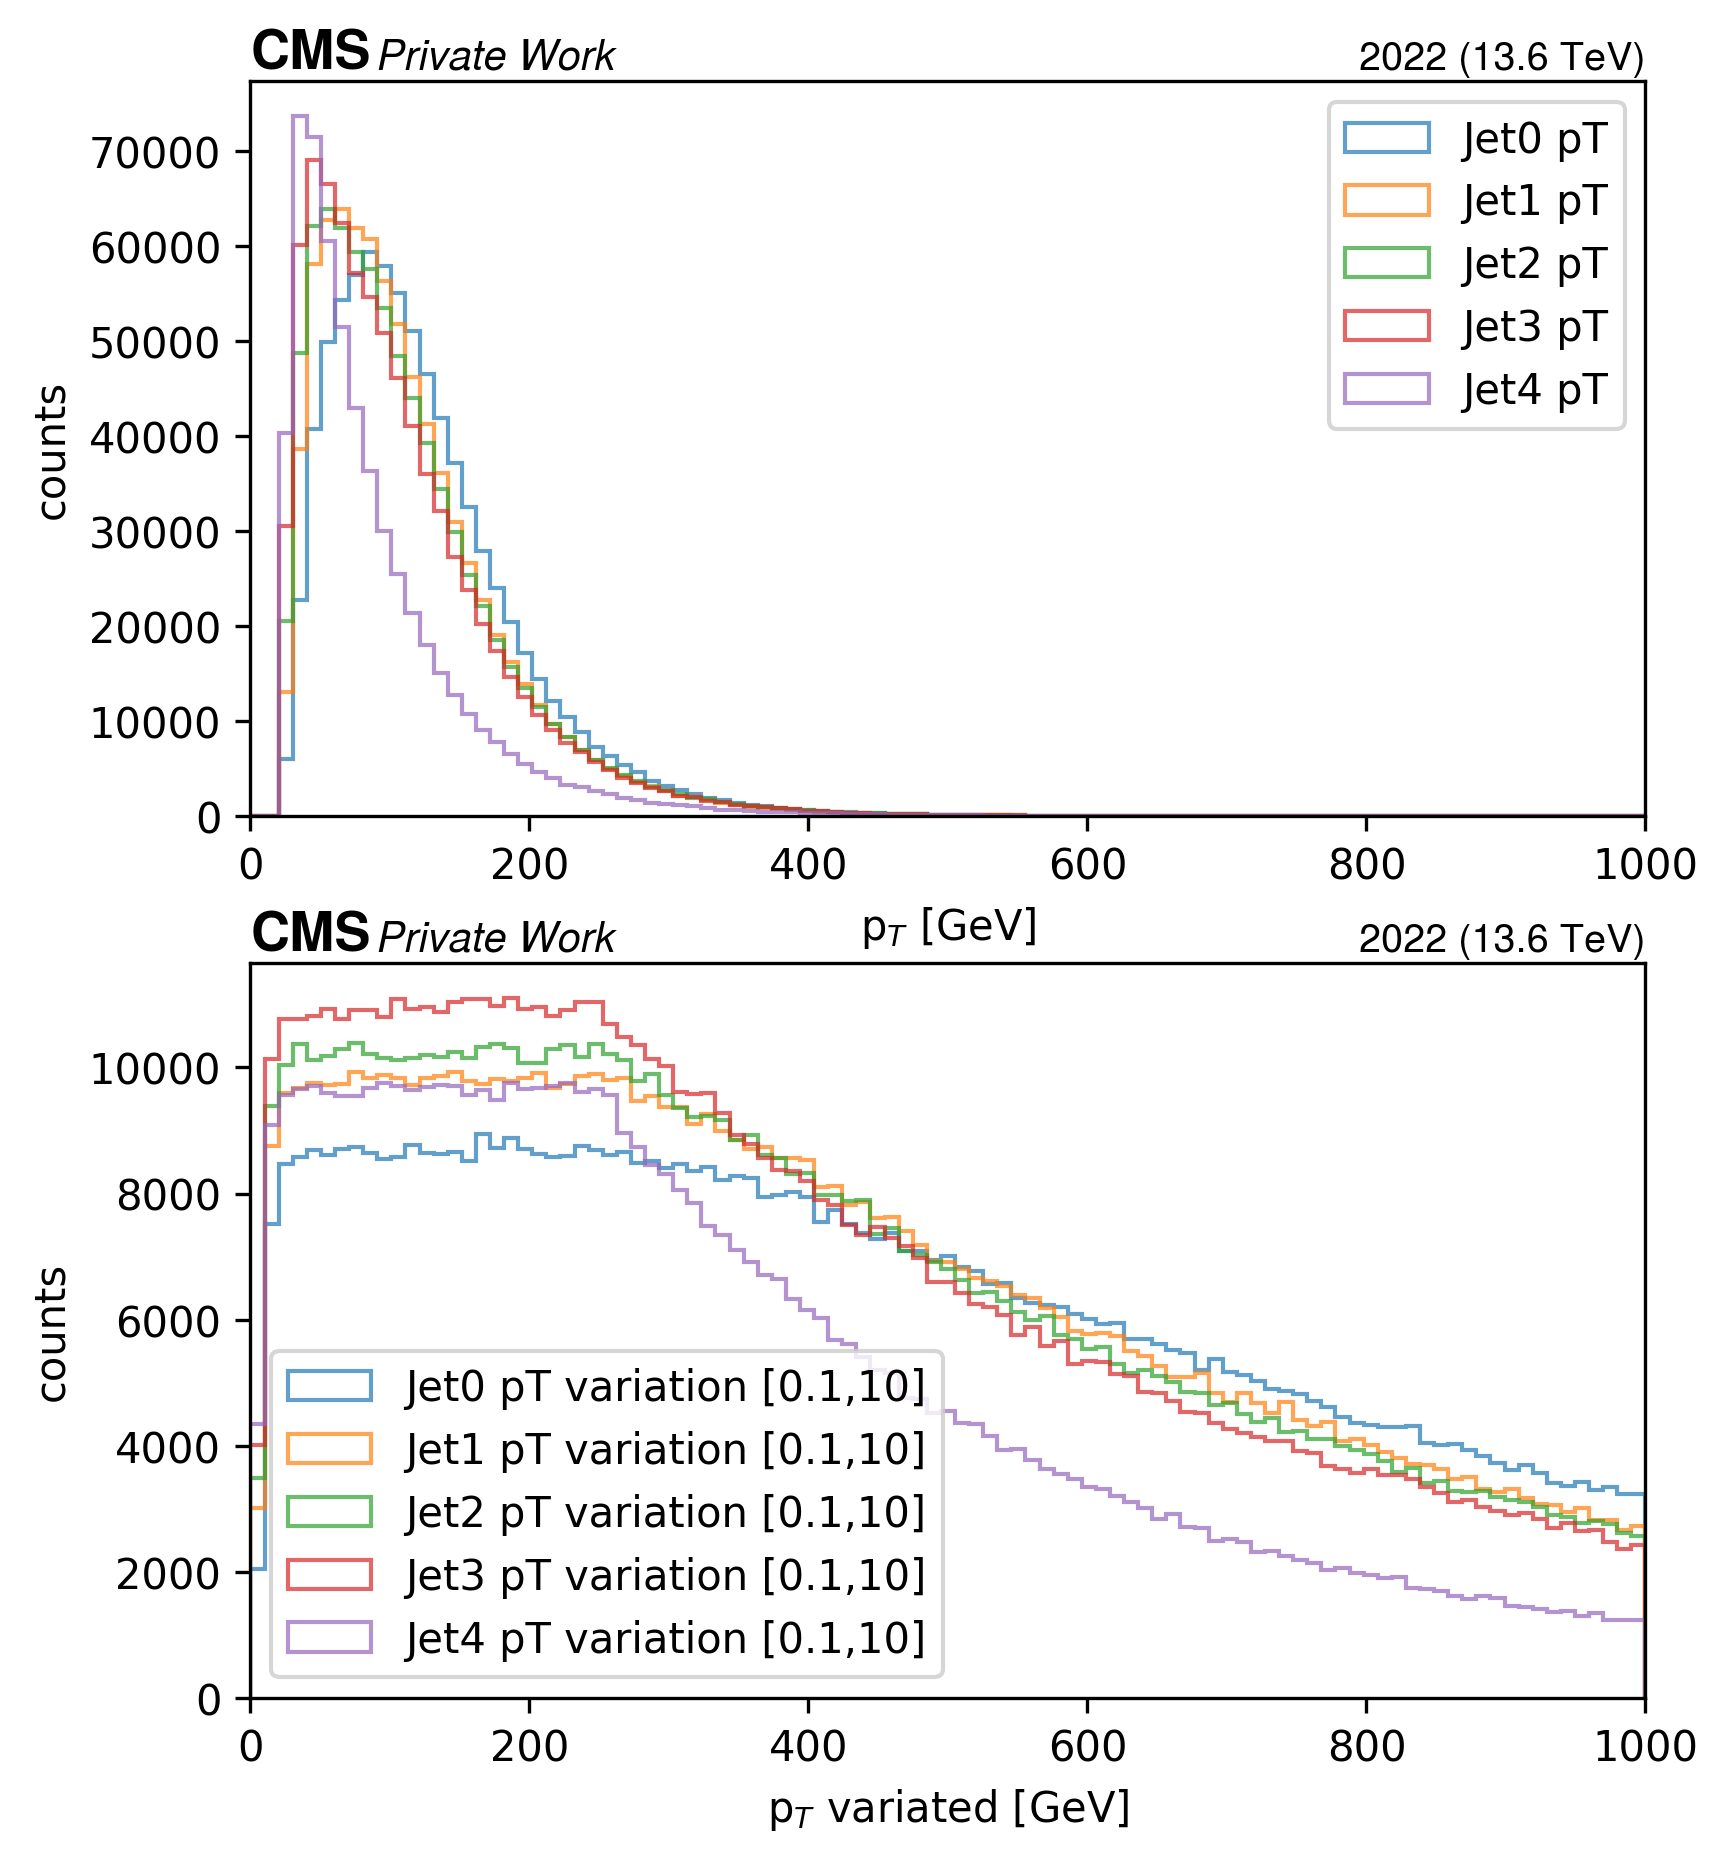

In [16]:
bins = np.linspace(0,1000,100)
fig, (ax1,ax2) = plt.subplots(2,figsize=(6,7))
fig.suptitle=("jet_p$_T$ variation")

cols = ["blue","orange","darkgoldenrod","tan"]
for idx, jet in enumerate(jets_5):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax1.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} pT", alpha=0.7, linewidth=1, histtype="step")

for idx, jet in enumerate(jets_5_01_10):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax2.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} pT variation [0.1,10]", alpha=0.7, linewidth=1, histtype="step")

ax1.set_xlabel(r"p$_T$ [GeV]")
ax2.set_xlabel(r"p$_T$ variated [GeV]")
for ax in [ax1,ax2]:
    ax.set_ylabel(r"counts")
    ax.set_xlim(0,1000)
    ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax1,
    data=True
)
hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax2,
    data=True
)



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

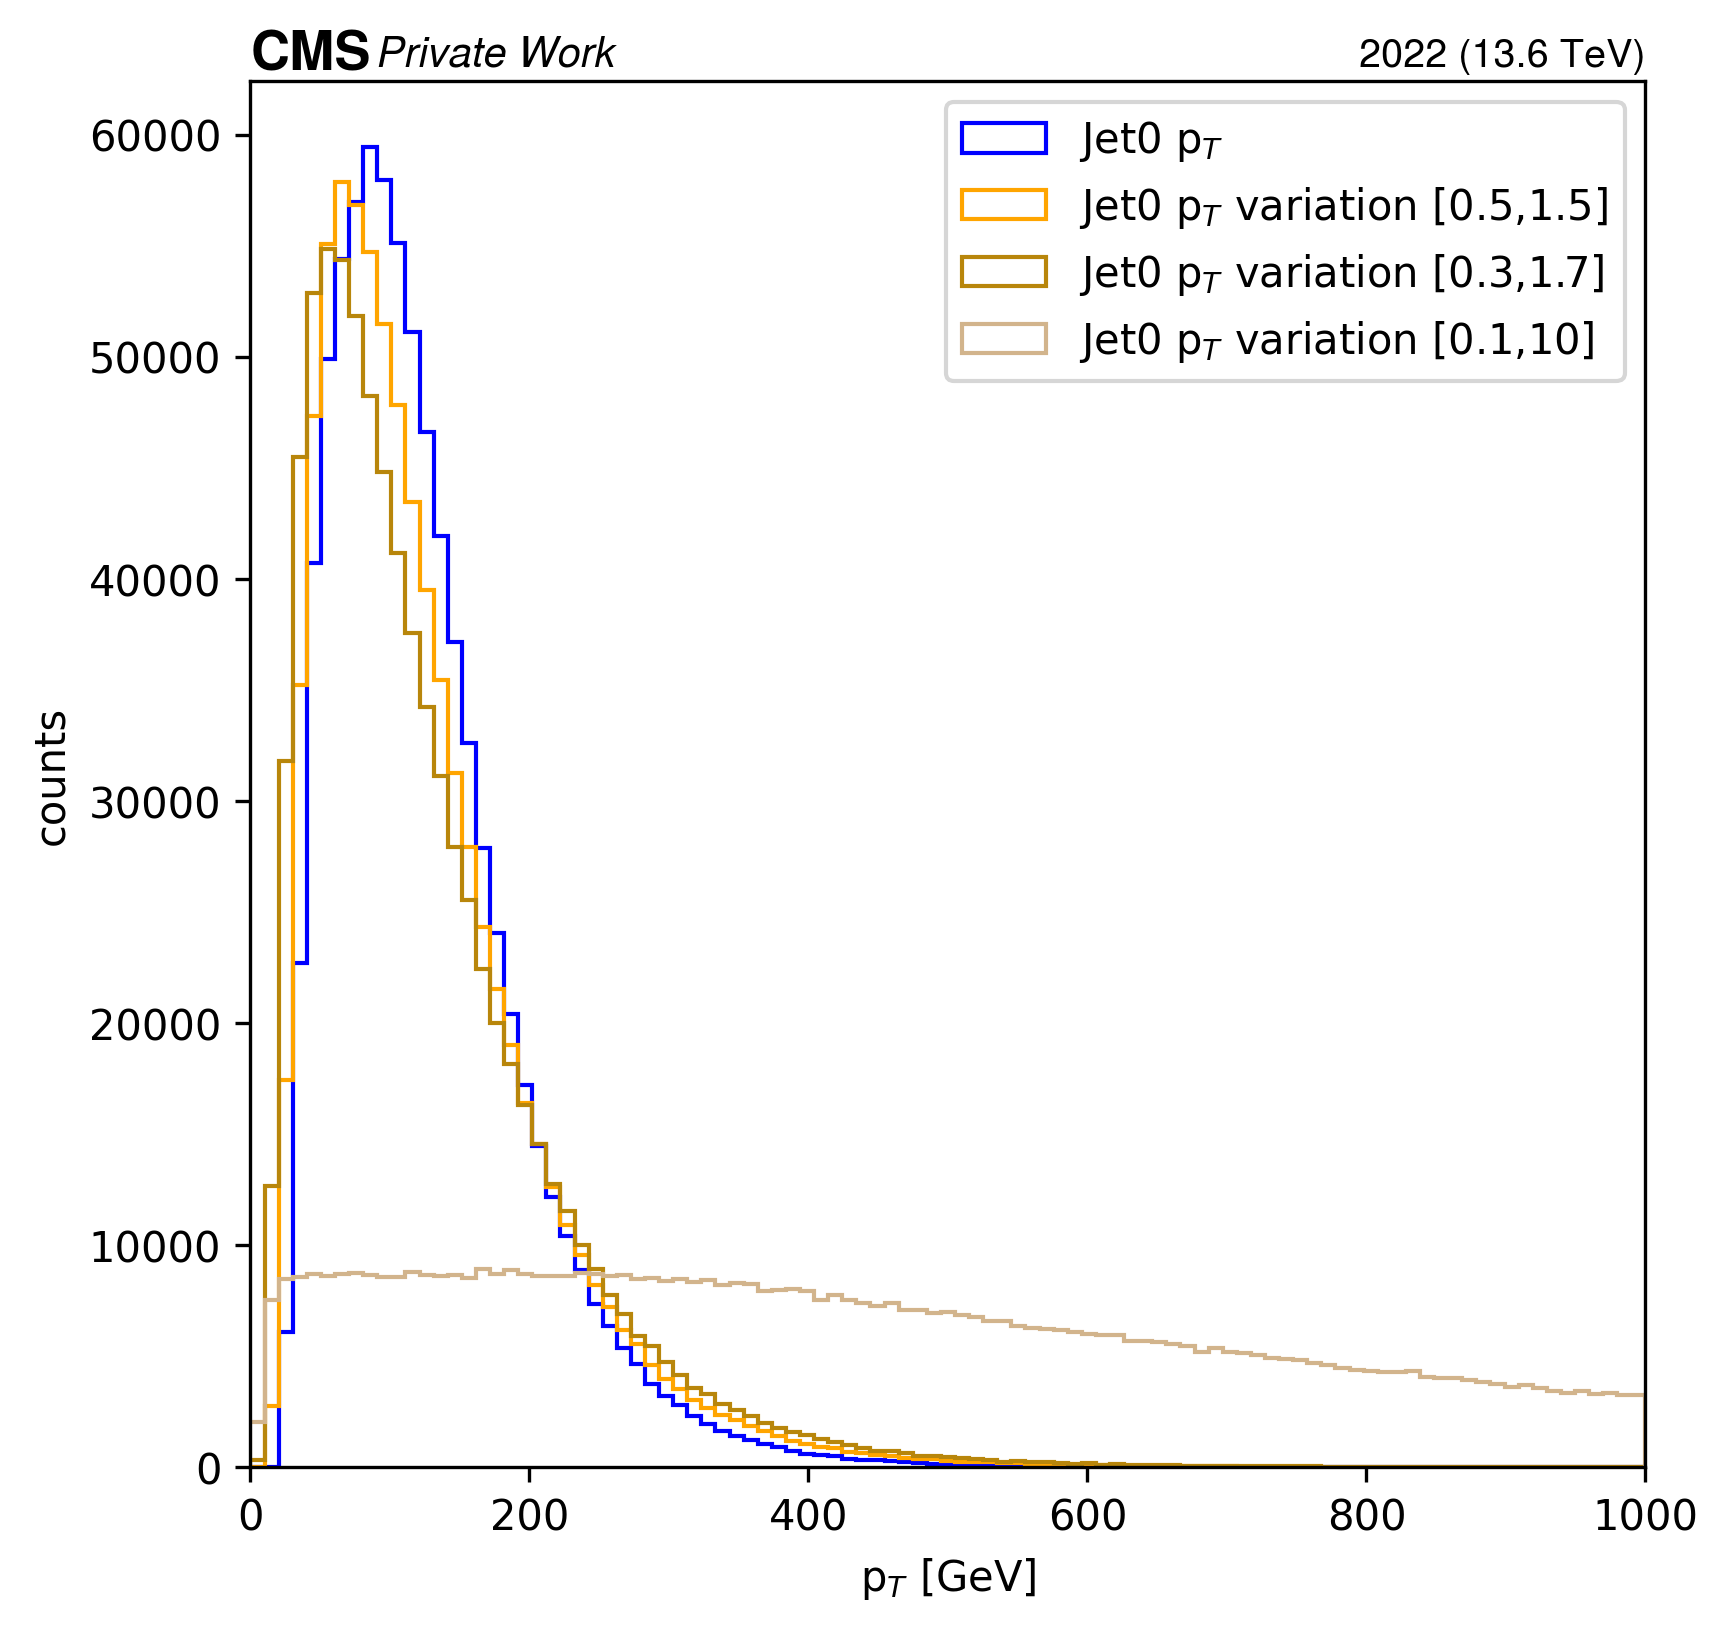

In [13]:
bins = np.linspace(0,1000,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("jet_p$_T$ variation")
ax1.set_title=("original p$_T$")
for idx, jet in enumerate([jets_5[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$", linewidth=1, histtype="step", color="blue")
for idx, jet in enumerate([jets_5_05_15[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.5,1.5]", linewidth=1, histtype="step", color="orange")
for idx, jet in enumerate([jets_5_03_17[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.3,1.7]", linewidth=1, histtype="step", color="darkgoldenrod")
for idx, jet in enumerate([jets_5_01_10[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.1,10]", linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"p$_T$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,1000)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)

In [7]:

import vector
vector.register_awkward()

n = col_4b["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_orig = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]
print(higgs_orig[0].mass)


[129, 66.1, 104, 122, 132, 111, 131, 85.8, ... 121, 122, 121, 141, 89.6, 135, 98.7]


In [8]:
n = col_4b_05_15["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_05_15["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_05_15["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_05_15["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_05_15["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_05_15["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_05_15 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

In [9]:
n = col_4b_03_17["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_03_17["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_03_17["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_03_17["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_03_17["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_03_17["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_03_17 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

In [10]:
n = col_4b_01_10["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_01_10["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_01_10["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_01_10["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_01_10["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_01_10["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_01_10 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

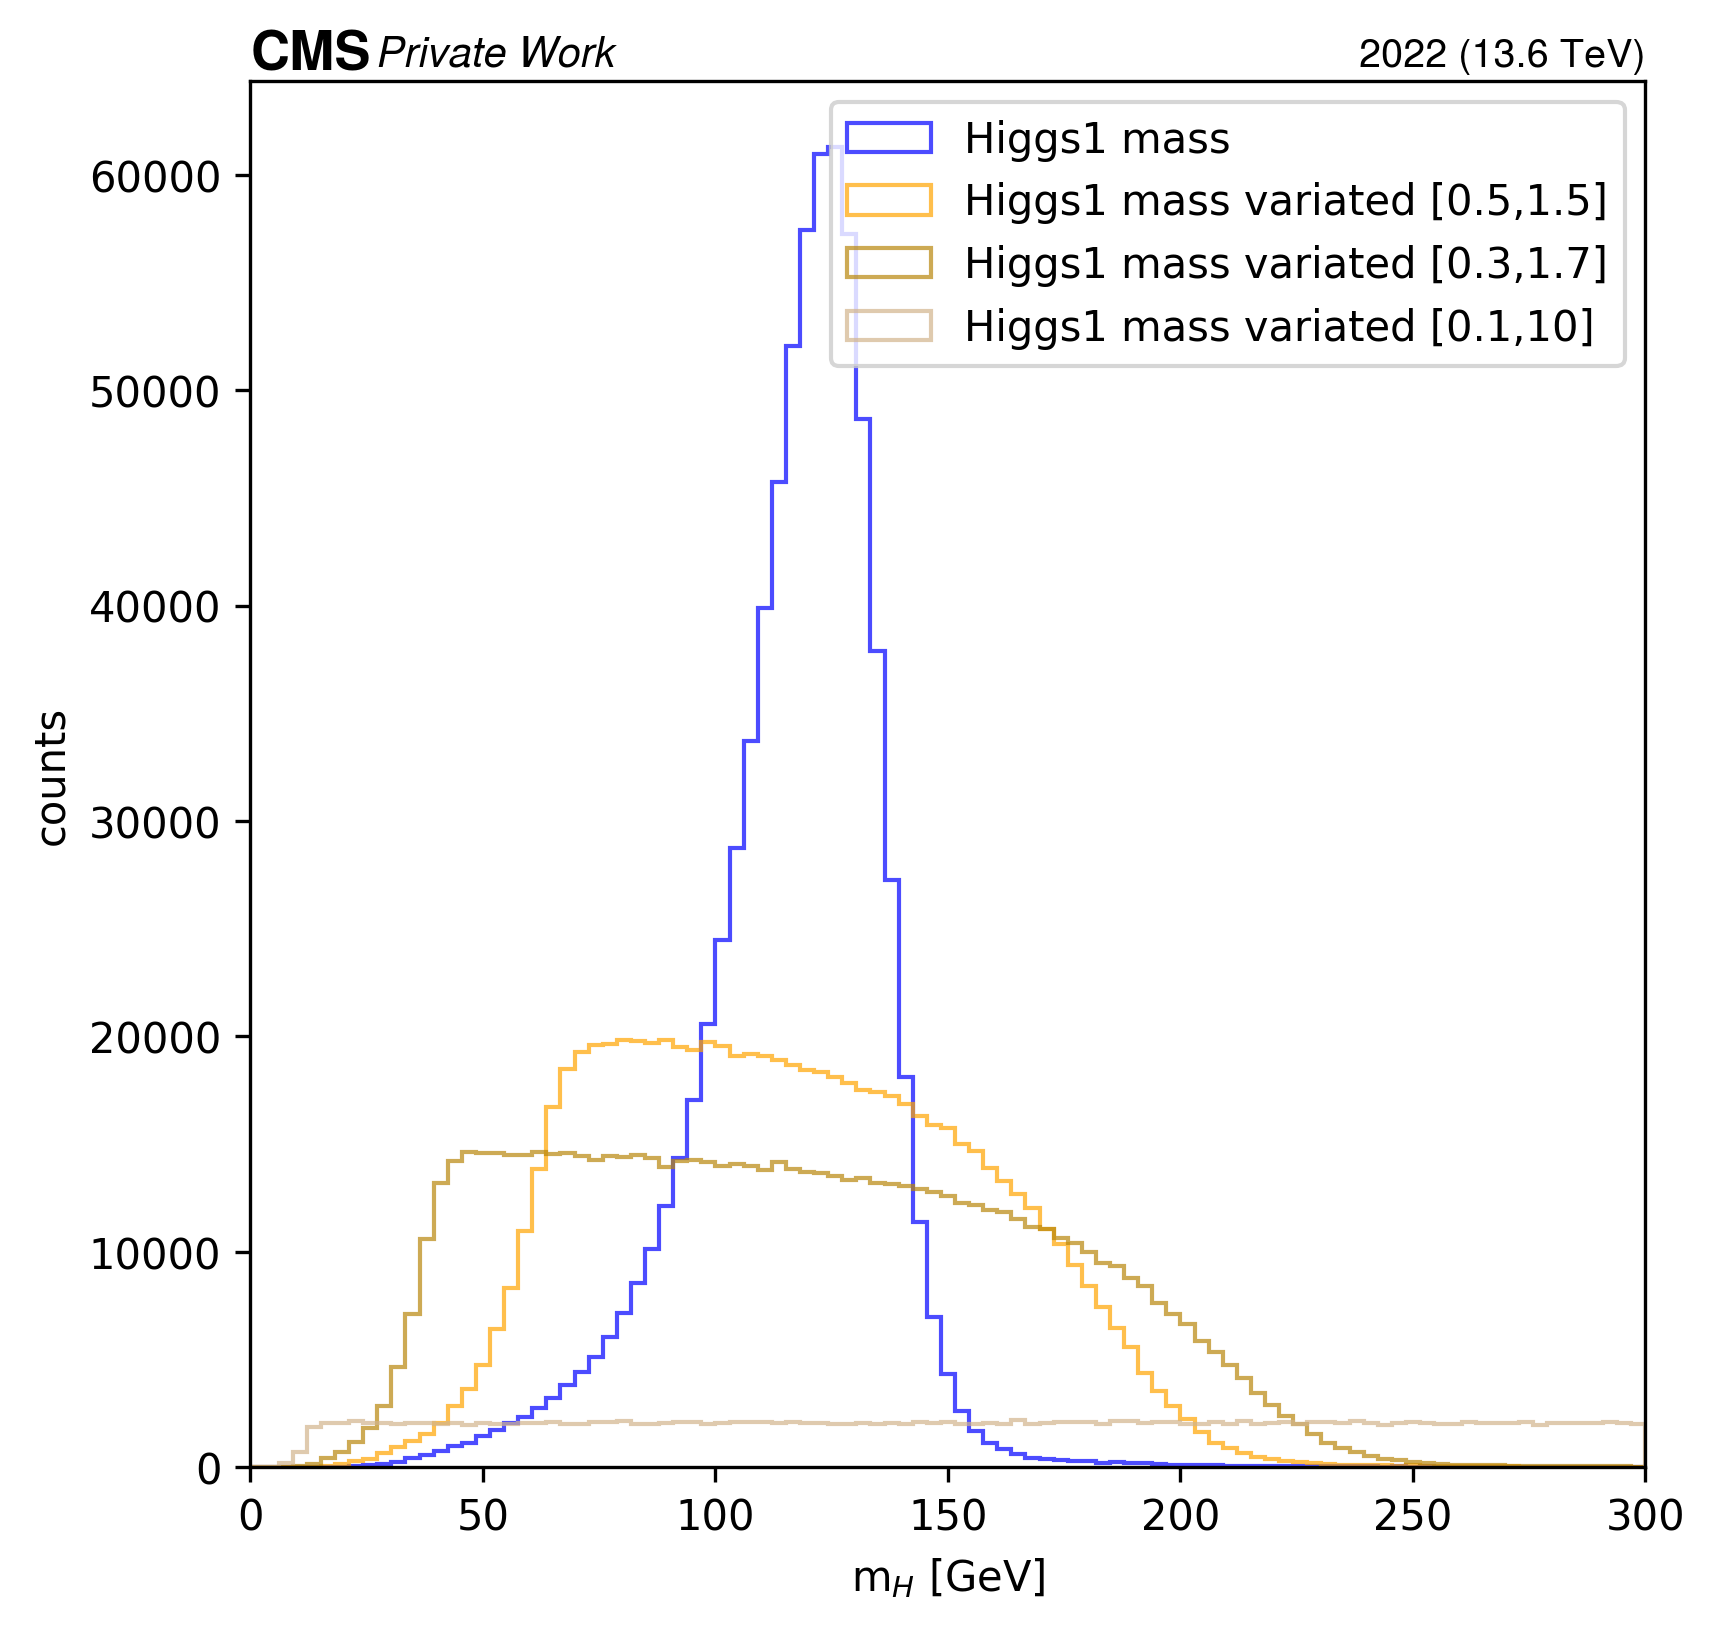

In [11]:
bins = np.linspace(0,300,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("Higgs mass variation")

counts, bins = np.histogram(higgs_orig[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass", alpha=0.7, linewidth=1, histtype="step", color="blue")
counts, bins = np.histogram(higgs_05_15[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.5,1.5]", alpha=0.7, linewidth=1, histtype="step", color="orange")
counts, bins = np.histogram(higgs_03_17[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.3,1.7]", alpha=0.7, linewidth=1, histtype="step", color="darkgoldenrod")
counts, bins = np.histogram(higgs_01_10[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.1,10]", alpha=0.7, linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"m$_H$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,300)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

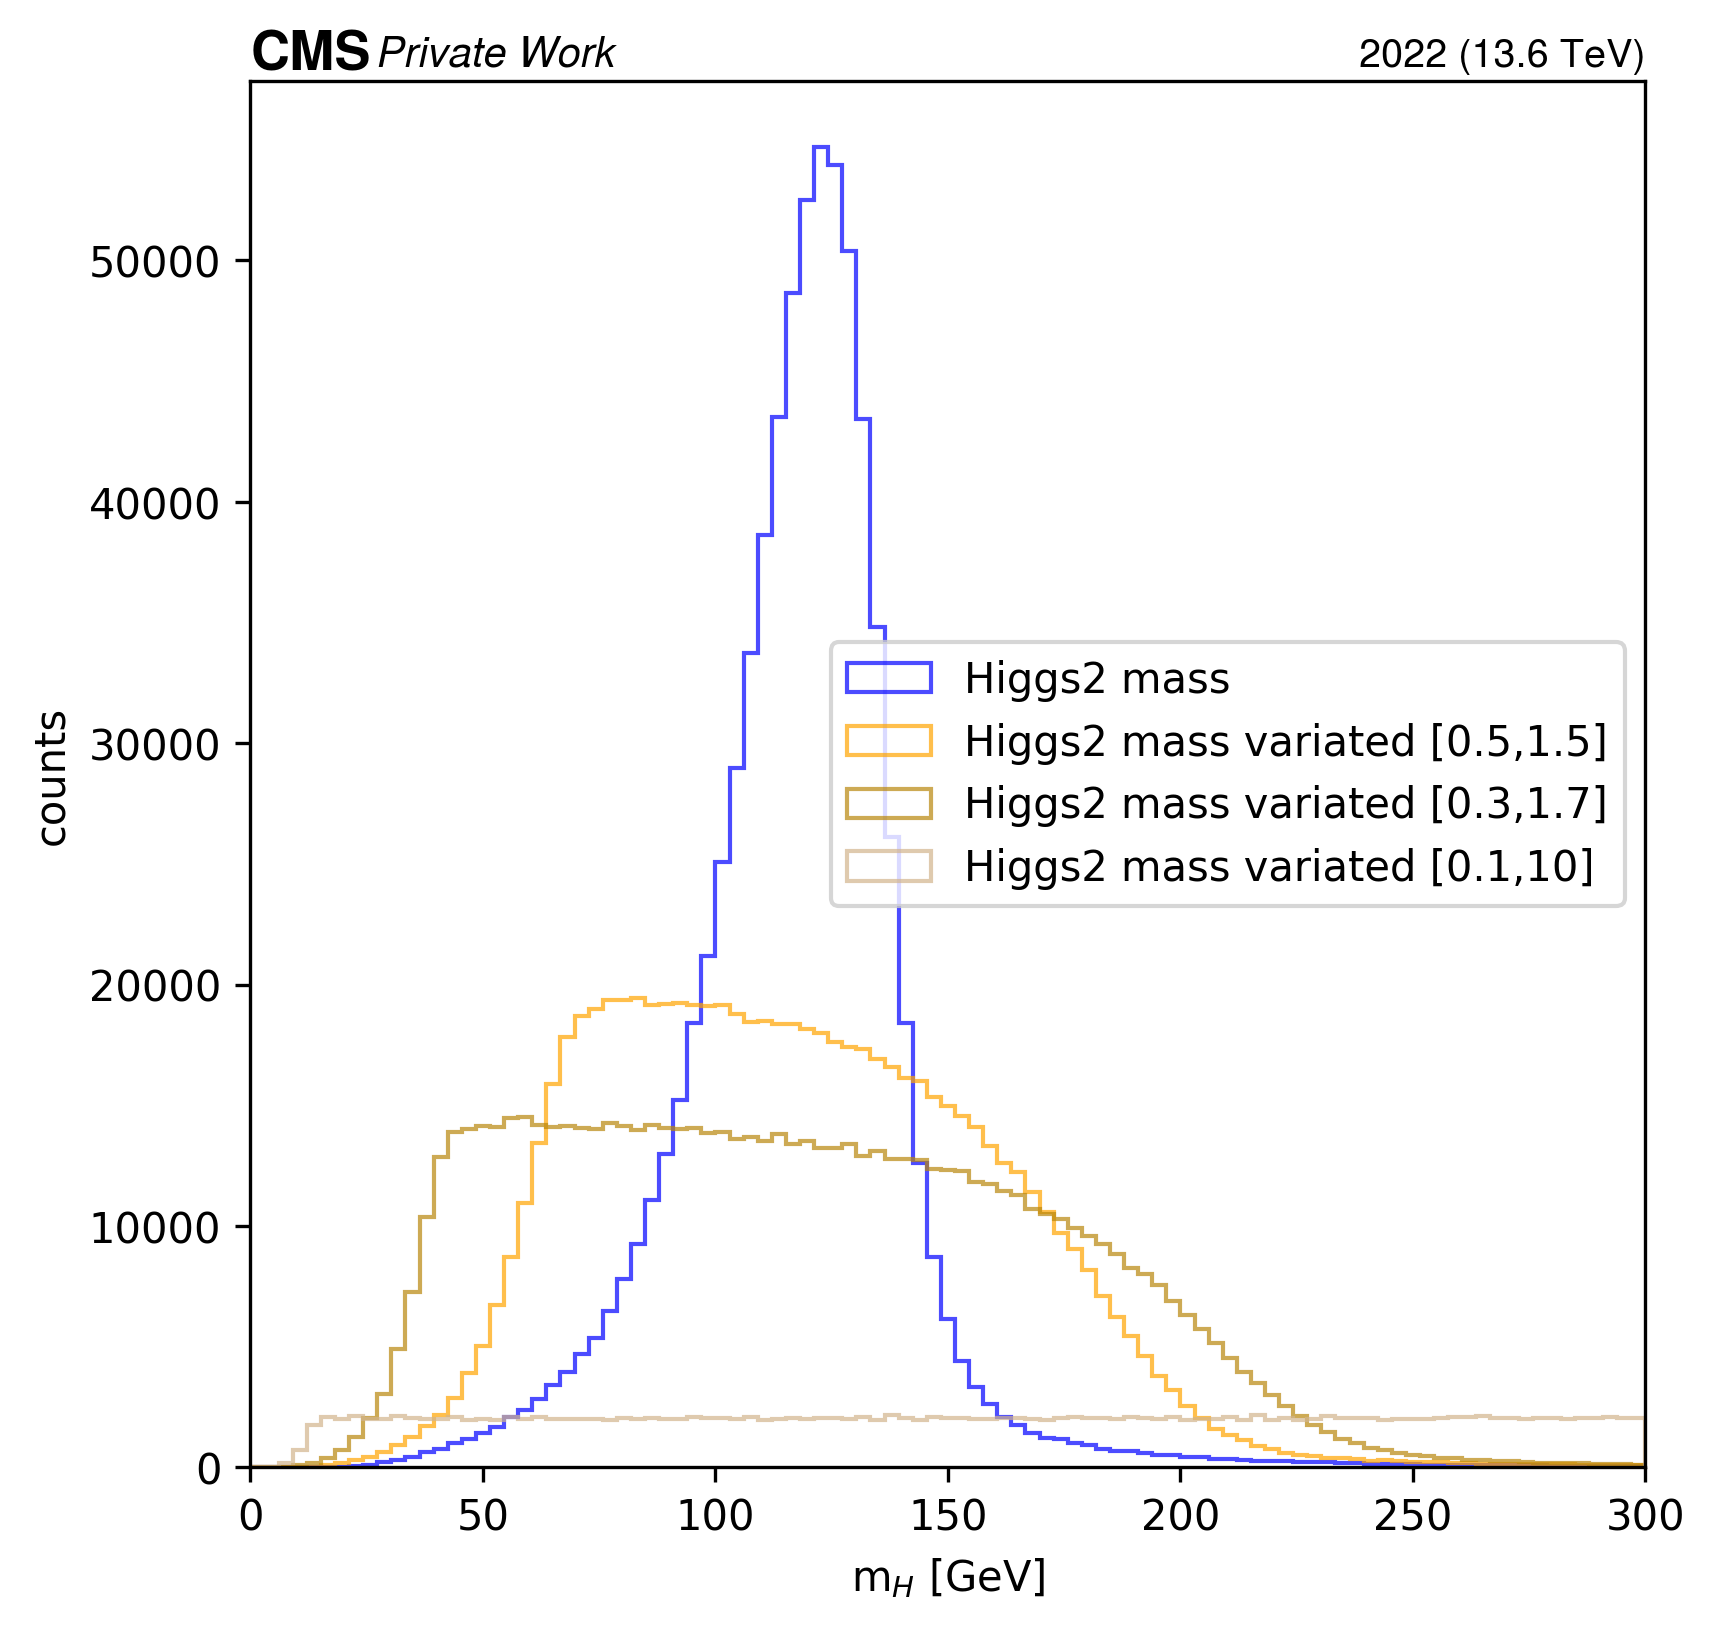

In [12]:
bins = np.linspace(0,300,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("Higgs mass variation")

counts, bins = np.histogram(higgs_orig[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass", alpha=0.7, linewidth=1, histtype="step", color="blue")
counts, bins = np.histogram(higgs_05_15[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.5,1.5]", alpha=0.7, linewidth=1, histtype="step", color="orange")
counts, bins = np.histogram(higgs_03_17[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.3,1.7]", alpha=0.7, linewidth=1, histtype="step", color="darkgoldenrod")
counts, bins = np.histogram(higgs_01_10[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.1,10]", alpha=0.7, linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"m$_H$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,300)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)

# Compare for variation files

In [31]:
# input = "/work/tharte/datasets/data_samples/bg_morph_2022_SPANET_baseline/output_DATA_JetMET_JMENano_E_2022_postEE_EraE.coffea"
input_novar = "/work/tharte/datasets/sig_bkg_classifier/spanet_ptflat_btag5WP_novariations_debugging/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"
input_var = "/work/tharte/datasets/sig_bkg_classifier/spanet_ptflat_btag5WP_variations_debugging/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"


def get4b(input):
    o = load(f"{input}")
    # print(o)
    # print(o["columns"])
    samples=list(o["columns"].keys())
    for sample in samples:
        datasets=list(o["columns"][sample].keys())
        for dataset in datasets:
            categories=list(o["columns"][sample][dataset].keys())
            for category in categories:
                variations=o["columns"][sample][dataset][category].keys()
                for var in variations:
                    col=o["columns"][sample][dataset][category][var]
    
    # Fix the columns I want:
    sample = samples[0]
    dataset = datasets=list(o["columns"][sample].keys())[0]
    categories=list(o["columns"][sample][dataset].keys())
    
    return o["columns"][sample][dataset]

col_cat_novar = get4b(input_novar)
col_cat_var = get4b(input_var)


In [43]:
for category in col_cat_novar.keys():
    print(category)
    for column in col_cat_novar[category]["nominal"]:
        print(column)
        if all(col_cat_novar[category]["nominal"][column].value == col_cat_var[category]["nominal"][column].value):
            continue
        else:
            print(f"column size: {len(col_cat_novar[category]['nominal'][column].value)}")
            for i in range(len(col_cat_novar[category]["nominal"][column].value)):
                if col_cat_novar[category]['nominal'][column].value[i] != col_cat_var[category]['nominal'][column].value[i]:
                    print(f"index {i}: novar, {col_cat_novar[category]['nominal'][column].value[i]} | var  : {col_cat_var[category]['nominal'][column].value[i]}")
    print("\n")

4b_control_region
weight
events_HT
events_dR_max
events_sigma_over_higgs1_reco_mass
events_sigma_over_higgs2_reco_mass
events_era
events_Arctanh_Delta_pairing_probabilities
events_Padded_Arctanh_Delta_pairing_probabilities
events_Binned_Arctanh_Delta_pairing_probabilities
events_year
events_dR_min
events_Delta_pairing_probabilities
HH_dPhi
HH_mass
HH_phi
HH_eta
HH_dEta
HH_dR
HH_pt
HH_Costhetastar_CS
HiggsLeading_dPhi
HiggsLeading_mass
HiggsLeading_helicityCosTheta
HiggsLeading_phi
HiggsLeading_eta
HiggsLeading_dEta
HiggsLeading_dR
HiggsLeading_pt
HiggsSubLeading_dPhi
HiggsSubLeading_mass
HiggsSubLeading_helicityCosTheta
HiggsSubLeading_phi
HiggsSubLeading_eta
HiggsSubLeading_dEta
HiggsSubLeading_dR
HiggsSubLeading_pt
JetGoodFromHiggsOrdered_N
JetGoodFromHiggsOrdered_phi
JetGoodFromHiggsOrdered_mass
JetGoodFromHiggsOrdered_pt
JetGoodFromHiggsOrdered_eta
add_jet1pt_mass
column size: 363
index 22: novar, 4.590160369873047 | var  : 8.266100883483887
index 34: novar, -999.0 | var  : 6.63865